In [2]:
import datajoint as dj
dj.config['display.limit'] = 10

In [3]:
dj.config['database.host'] = 'datajoint.it.ntnu.no'
dj.conn()

Connecting thinh@datajoint.it.ntnu.no:3306


DataJoint connection (connected) thinh@datajoint.it.ntnu.no:3306

In [4]:
animal = dj.create_virtual_module('animal', 'prod_mlims_data')
reference = dj.create_virtual_module('reference', 'group_shared_reference')
acquisition = dj.create_virtual_module('acquisition', 'group_shared_acquisition')
tracking = dj.create_virtual_module('tracking', 'group_shared_tracking')
behavior = dj.create_virtual_module('behavior', 'group_shared_behavior')
ephys = dj.create_virtual_module('ephys', 'group_shared_ephys')
analysis = dj.create_virtual_module('analysis', 'group_shared_analysis')
ingestion = dj.create_virtual_module('analysis', 'group_shared_ingestion')

In [9]:
(acquisition.Session & (animal.Animal & 'animal_name = "24321"')).delete()

About to delete:
`group_shared_acquisition`.`cluster_session_group__group_member`: 1 items
`group_shared_acquisition`.`session__neurologger_probe_association`: 2 items
`group_shared_acquisition`.`_recording__recording_sync`: 2 items
`group_shared_ephys`.`_l_f_p__channel_l_f_p`: 32 items
`group_shared_ephys`.`_l_f_p`: 1 items
`group_shared_analysis`.`__skipped_task_spikes_tracking`: 2 items
`group_shared_analysis`.`__h_d_tuning`: 31 items
`group_shared_analysis`.`__task_spikes_tracking`: 31 items
`group_shared_ephys`.`__spikes_tracking_proxy`: 33 items
`group_shared_ephys`.`__spikes_tracking`: 33 items
`group_shared_ephys`.`_unit_spike_times`: 147 items
`group_shared_acquisition`.`_recording`: 2 items
`group_shared_ingestion`.`__inserted_curated_clustering`: 2 items
`group_shared_ingestion`.`__processed_curated_clustering_request`: 3 items
`group_shared_ingestion`.`curated_clustering_request`: 3 items
`group_shared_ingestion`.`__inferred_behavior_task`: 2 items
`group_shared_acquisition

In [ ]:
class UnitGroup(dj.Manual):
    definition = """
    -> acquisition.ProbeInsertion
    super_unit_id: int
    """
    
class UnitMember(dj.Manual):
    definition = """
    -> UnitGroup
    ---
    -> ephys.Unit    
    """

In [79]:
acquisition.ProbeInsertion.aggr(acquisition.Recording, count='count(*)')

animal_id,datasource_id,insertion_time When this probe was inserted,count calculated attribute
00342c6d86e97d43,0,2019-07-03 12:00:00,1
40bfa03a7a7018cc,0,2019-09-11 14:08:45,1
40bfa03a7a7018cc,0,2019-09-11 14:09:22,1
61fd2ac184c13c73,0,2017-10-02 00:00:00,145
6a61369265b193e8,0,2017-10-04 00:00:00,120
96129eb1563c0b0d,0,2018-06-05 10:51:30,1
9d6b85b1e899eb94,0,2015-01-01 00:01:00,1
9d6b85b1e899eb94,0,2015-01-01 00:02:00,1
b013c9113d60f3e6,0,2019-04-20 00:00:00,1
b013c9113d60f3e6,0,2019-04-20 01:00:00,1


In [80]:
probe_key = acquisition.ProbeInsertion & 'insertion_time = "2017-10-04 00:00:00"'

In [86]:
ephys.Unit & probe_key & 'cluster_type = "good"'

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit,electrode_group electrode group,electrode electrode,cluster_type
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,5008,5,0,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,5016,5,0,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,8011,8,12,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,8019,8,12,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,8040,8,12,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,8042,8,12,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_13391cf1a647f8e92ccedcb3afc2a251,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-17 13:57:58,6033,6,4,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_16ae3cc3249897cd2c53d66b39a90649,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-22 11:16:10,5010,5,0,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_16ae3cc3249897cd2c53d66b39a90649,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-22 11:16:10,5016,5,0,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_16ae3cc3249897cd2c53d66b39a90649,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-22 11:16:10,6005,6,4,Good


In [90]:
ephys.Unit & probe_key & 'unit = "5008"'

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit,electrode_group electrode group,electrode electrode,cluster_type
6a61369265b193e8,0,2017-10-04 00:00:00,det_0646d5555bc1299437185e7d8c1c2816,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-12 15:44:32,5008,5,0,Good
6a61369265b193e8,0,2017-10-04 00:00:00,det_13391cf1a647f8e92ccedcb3afc2a251,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-17 13:57:58,5008,5,0,MUA
6a61369265b193e8,0,2017-10-04 00:00:00,det_16ae3cc3249897cd2c53d66b39a90649,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-22 11:16:10,5008,5,0,MUA
6a61369265b193e8,0,2017-10-04 00:00:00,det_1ba81cdef70f9cf1d535152abe42af86,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-19 12:07:50,5008,5,0,Unsorted
6a61369265b193e8,0,2017-10-04 00:00:00,det_571c57dd5a9d3b92a7874cfb9d71edee,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2018-01-11 11:59:47,5008,5,0,MUA
6a61369265b193e8,0,2017-10-04 00:00:00,det_59d1d0f6fc017b529a837882a42c524a,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-12 11:16:20,5008,5,0,Unsorted
6a61369265b193e8,0,2017-10-04 00:00:00,det_65d7764d5691d40ff05d6e7764cfdbfa,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-04 11:49:54,5008,5,0,MUA
6a61369265b193e8,0,2017-10-04 00:00:00,det_8a054016a7792097cb3df3e7d7a0d758,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-11-21 17:20:40,5008,5,0,MUA
6a61369265b193e8,0,2017-10-04 00:00:00,det_929315e4cfa2cea8b775a5c267b97758,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-23 14:14:39,5008,5,0,Unsorted
6a61369265b193e8,0,2017-10-04 00:00:00,det_a3cfaad818a37aa6683fc5b8e7d2fb20,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-09-09 14:54:57,5008,5,0,Unsorted


In [92]:
k5008 = (ephys.Unit & probe_key & 'unit = "5008"' & 'curation_timestamps = "2017-10-12 15:44:32"').fetch1('KEY')

In [93]:
k5008

{'animal_id': '6a61369265b193e8',
 'datasource_id': 0,
 'insertion_time': datetime.datetime(2017, 10, 4, 0, 0),
 'group_name': 'det_0646d5555bc1299437185e7d8c1c2816',
 'time_window_id': 'a1c6a0bfe97cd18966cb6fdb87c75687',
 'cluster_method': 'klustakwik',
 'cluster_param_name': 'default_klustakwik',
 'probe_model': '4-tetrode-array',
 'electrode_config_id': '657119cc9e911c2c8a536abce16264f0',
 'sync_method': 'presync',
 'curation_timestamps': datetime.datetime(2017, 10, 12, 15, 44, 32),
 'unit': 5008}

In [95]:
tracking.Tracking.describe();

-> acquisition.Session
tracking_time        : datetime                     # start time of this tracking recording
---
-> tracking.TrackingType
tracking_name        : varchar(40)                  # user-assign name of this tracking (e.g. 27032019laserSess1)
tracking_sample_rate : float                        # (Hz)
tracking_timestamps  : longblob                     # (s) timestamps of the frame in the tracking system clock, w.r.t the start of this tracking



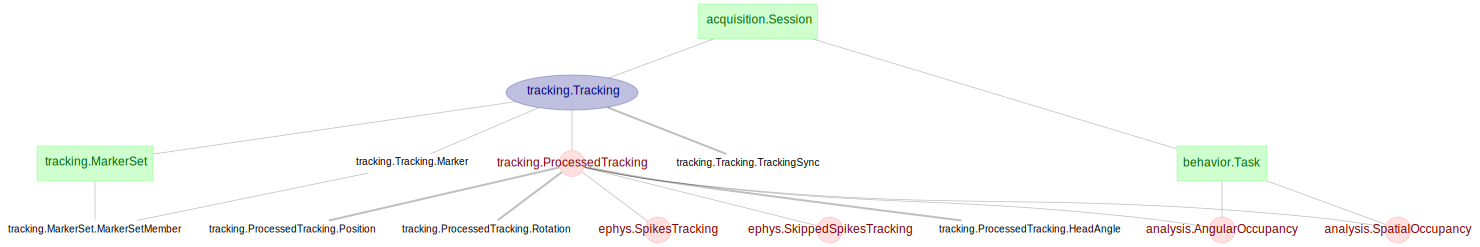

In [100]:
dj.Diagram(tracking.Tracking) + 2 + acquisition.Session

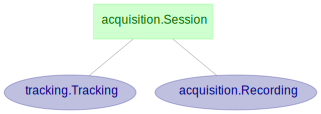

In [99]:
dj.Diagram(acquisition.Session) + tracking.Tracking + acquisition.Recording

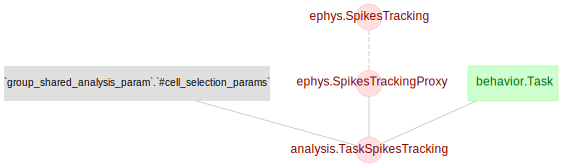

In [102]:
dj.Diagram(analysis.TaskSpikesTracking) - 1 + ephys.SpikesTracking

In [94]:
k5009 = (ephys.Unit & prob`e_key & 'unit = "5009"' & 'curation_timestamps = "2017-09-22 11:16:10"').fetch1('KEY')

In [ ]:
UnitGroup.insert1(myprobe, 123135234)
UnitMember.insert1({**my_group, **k5008})
UnitMember.insert1({**my_group, **k5009})

In [ ]:
UnitMember & (UnitGroup & 'super_unit_id = 123135234')

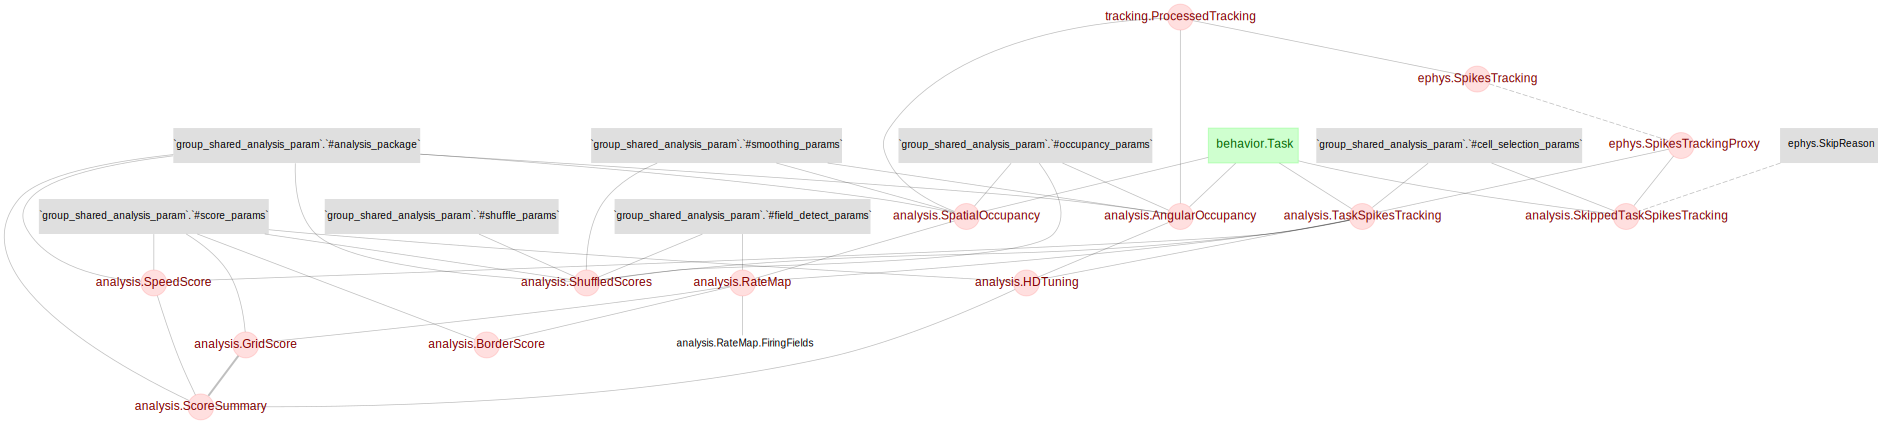

In [97]:
dj.Diagram(analysis) - 1

In [109]:
analysis.RateMap.heading

# 
animal_id            : char(16)                     # 
datasource_id        : int                          # 
session_time         : datetime                     # start time of this session
task_type            : varchar(32)                  # 
task_start           : decimal(6,2)                 # (s) timestamp of task onset with respect to the start of the session
unit                 : smallint                     # unit id
spike_tracking_hash  : varchar(32)                  # hash of the SpikesTracking primary_key
cell_selection_params_name : varchar(32)                  # user-friendly name
tracking_time        : datetime                     # start time of this tracking recording
tracking_processing_method : varchar(16)                  # 
sync_method          : varchar(16)                  # sync method name
occu_params_name     : varchar(32)                  # Parameter set ID, starting with 'default'
smoothing_params_name : varchar(32)                  # 
analysis_package  

In [106]:
ephys.SpikesTrackingProxy.heading

# 
animal_id            : char(16)                     # animal
datasource_id        : int                          # animal
session_time         : datetime                     # start time of this session
unit                 : smallint                     # unit id
spike_tracking_hash  : varchar(32)                  # hash of the SpikesTracking primary_key
---
insertion_time       : datetime                     # When this probe was inserted
group_name           : varchar(36)                  # 
time_window_id       : varchar(32)                  # or maybe a hash of all the part windows
cluster_method       : varchar(16)                  # name of clustering method
cluster_param_name   : varchar(36)                  # some unique name, or maybe hash of the dict of the param (ordered)
probe_model          : varchar(32)                  # nick name, or other user-friendly model name of this probe
electrode_config_id  : varchar(36)                  # hash of the group and group_member 

In [74]:
keys = ephys.CuratedClustering.fetch('KEY')

In [75]:
key = keys[4]

In [78]:
ephys.Unit & key & 'cluster_type = "good"' & 'unit = 5011'

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit,electrode_group electrode group,electrode electrode,cluster_type
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_45755729595bb31b8a98dcb4a739c8fa,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-11-18 16:22:48,5011,5,0,Good


In [ ]:
ks = behavior.Task * ephys.SpikesTrackingProxy * analysis_param.CellSelectionParams
if dj.config['custom'].get('user_restricted', False):
    r_ks = ((ks * ephys.CuratedClustering
             * analysis_param.CellAnalysisMethod.CellSelectionParams
             * analysis_param.CellAnalysisMethodUsers.proj(curator='method_user'))
            - SkippedTaskSpikesTracking)
    return dj.U(*ks.primary_key) & r_ks
else:
    return ks - SkippedTaskSpikesTracking

In [11]:
acquisition.Recording & 'recording_system = "axona"'

animal_id,datasource_id,session_time start time of this session,insertion_time When this probe was inserted,recording_time start time of this recording,recording_system,"probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),recording_order the ordering of this recording in this session,recording_duration (s) duration of this recording,recording_name name of this recording (e.g. 27032019laserSess1)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 15:54:25,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,0,1958.0,02102017s1
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:28:38,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,1,81.0,02102017laserSess1(1mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:30:46,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,2,81.0,02102017laserSess1(2mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:32:47,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,3,80.0,02102017laserSess1(3mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:34:32,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,4,81.0,02102017laserSess1(4mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:37:12,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,5,81.0,02102017laserSess1(7mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:38:46,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,6,80.0,02102017laserSess1(9mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:42:03,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,7,81.0,02102017laserSess1(12mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:43:54,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,8,81.0,02102017laserSess1(20mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:45:34,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,9,81.0,02102017laserSess1(30mw)


In [15]:
probe_keys = (acquisition.ProbeInsertion & 'animal_id = "61fd2ac184c13c73"').fetch('KEY')

In [16]:
probe_keys

[{'animal_id': '61fd2ac184c13c73',
  'datasource_id': 0,
  'insertion_time': datetime.datetime(2016, 9, 20, 15, 20, 4)},
 {'animal_id': '61fd2ac184c13c73',
  'datasource_id': 0,
  'insertion_time': datetime.datetime(2017, 10, 2, 0, 0)}]

In [17]:
probe_key = probe_keys[-1]

In [20]:
acquisition.Recording & probe_key

animal_id,datasource_id,session_time start time of this session,insertion_time When this probe was inserted,recording_time start time of this recording,recording_system,"probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),recording_order the ordering of this recording in this session,recording_duration (s) duration of this recording,recording_name name of this recording (e.g. 27032019laserSess1)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 15:54:25,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,0,1958.0,02102017s1
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:28:38,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,1,81.0,02102017laserSess1(1mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:30:46,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,2,81.0,02102017laserSess1(2mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:32:47,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,3,80.0,02102017laserSess1(3mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:34:32,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,4,81.0,02102017laserSess1(4mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:37:12,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,5,81.0,02102017laserSess1(7mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:38:46,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,6,80.0,02102017laserSess1(9mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:42:03,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,7,81.0,02102017laserSess1(12mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:43:54,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,8,81.0,02102017laserSess1(20mw)
61fd2ac184c13c73,0,2017-10-02 15:54:25,2017-10-02 00:00:00,2017-10-02 16:45:34,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,9,81.0,02102017laserSess1(30mw)


In [26]:
ephys.CuratedClustering & (acquisition.Recording & probe_key).proj()

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),curator,curation_notes,"repository e.g. 'Local', 'Network'",curation_output_dir
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_0033b4a248738944d352d904dd830875,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2018-02-15 11:35:57,davidcr,,network,davidcr/74956/15022018/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_0fb019330f04214e309f896ab52f407e,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-12-10 15:55:03,davidcr,,network,davidcr/74956/10122017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_121ad375dd05ab19a4d212ee9678cc15,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-12-11 11:16:56,davidcr,,network,davidcr/74956/11122017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_3bc8648c35ec2177137626c5d9306655,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-11-17 15:51:16,davidcr,,network,davidcr/74956/17112017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_45755729595bb31b8a98dcb4a739c8fa,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-11-18 16:22:48,davidcr,,network,davidcr/74956/18112017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_4b4cbf8eafb60fa89a143f59544ca4b2,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2018-04-05 11:27:09,davidcr,,network,davidcr/74956/05042018/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_539b3cf505aeecc5f7fcb373328e4086,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2018-01-11 16:09:04,davidcr,,network,davidcr/74956/11012018/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_5454c413681c4b8663b712dfba24ba58,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-09 16:41:03,davidcr,,network,davidcr/74956/09102017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_586683b2e62a23297d41e8bedb5b542d,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-12-04 12:21:01,davidcr,,network,davidcr/74956/04122017/KLUSTA
61fd2ac184c13c73,0,2017-10-02 00:00:00,det_6c2d14fe4aebefa1e762acba7f48904a,a1c6a0bfe97cd18966cb6fdb87c75687,klustakwik,default_klustakwik,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,presync,2017-10-02 16:27:27,davidcr,,network,davidcr/74956/02102017/KLUSTA


In [27]:
reference.ClusterParam()

cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)",cluster_param_tag tag this param set for ease of use
kilosort,default_kilosort,final
klustakwik,default_klustakwik,final
tint,default_tint,final


In [28]:
reference.ClusterParam.insert1(('mclust', 'default_mclust', 'final'))

In [29]:
ephys.CuratedClustering * animal.Animal & 'animal_name = "25398"'

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),curator,curation_notes,"repository e.g. 'Local', 'Network'",curation_output_dir,animal_species,animal_name,animal_sex,animal_dob,color
b013c9113d60f3e6,0,2019-04-20 00:00:00,det_12f70b6e2723e5865f47234c00607471,a1c6a0bfe97cd18966cb6fdb87c75687,mclust,default_mclust,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,linear_interp,2019-09-03 17:01:53,jsblacks,,network,sampledata/axona/Jan Sigurd/0309201901,rat,25398,M,2019-01-11,None
b013c9113d60f3e6,0,2019-04-20 01:00:00,det_12f70b6e2723e5865f47234c00607471,a1c6a0bfe97cd18966cb6fdb87c75687,mclust,default_mclust,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,linear_interp,2019-09-03 17:01:53,jsblacks,,network,sampledata/axona/Jan Sigurd/0309201901,rat,25398,M,2019-01-11,None


In [43]:
ephys.Unit * animal.Animal & 'animal_name = "25398"'

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit,electrode_group electrode group,electrode electrode,cluster_type,animal_species,animal_name,animal_sex,animal_dob,color


In [53]:
(ephys.schema.jobs & 'table_name LIKE "%%unit%%"').fetch('key')

array([{'animal_id': '6a61369265b193e8', 'datasource_id': 0, 'insertion_time': datetime.datetime(2017, 10, 4, 0, 0), 'group_name': 'det_2e7d1e091f158b4cb1dc6918a3f1bade', 'time_window_id': 'a1c6a0bfe97cd18966cb6fdb87c75687', 'cluster_method': 'klustakwik', 'cluster_param_name': 'default_klustakwik', 'probe_model': '4-tetrode-array', 'electrode_config_id': '657119cc9e911c2c8a536abce16264f0', 'sync_method': 'presync', 'curation_timestamps': datetime.datetime(2017, 11, 24, 16, 23, 32)},
       {'animal_id': 'b013c9113d60f3e6', 'datasource_id': 0, 'insertion_time': datetime.datetime(2019, 4, 20, 0, 0), 'group_name': 'det_12f70b6e2723e5865f47234c00607471', 'time_window_id': 'a1c6a0bfe97cd18966cb6fdb87c75687', 'cluster_method': 'mclust', 'cluster_param_name': 'default_mclust', 'probe_model': '4-tetrode-array', 'electrode_config_id': 'e9c6dac82a8bcb02825b0be07735a967', 'sync_method': 'linear_interp', 'curation_timestamps': datetime.datetime(2019, 9, 3, 17, 1, 53)},
       {'animal_id': 'b013c

In [55]:
print((ephys.schema.jobs & 'error_message LIKE "%%Index%%"' & 'table_name LIKE "%%unit%%"').fetch('error_stack')[1])

Traceback (most recent call last):
  File "/home/ubuntu/dj36/lib/python3.6/site-packages/datajoint/autopopulate.py", line 160, in populate
    make(dict(key))
  File "/home/ubuntu/dj36/lib/python3.6/site-packages/ephys/ephys.py", line 485, in make
    'session_time', order_by='session_time', limit=1)[0]
IndexError: index 0 is out of bounds for axis 0 with size 0



In [56]:
key = (ephys.schema.jobs & 'error_message LIKE "%%Index%%"' & 'table_name LIKE "%%unit%%"').fetch('key')[1]

In [57]:
key

{'animal_id': '9d6b85b1e899eb94',
 'datasource_id': 0,
 'insertion_time': datetime.datetime(2015, 1, 1, 0, 2),
 'group_name': 'det_ffb9d67f8f8ec1f7faa8bd1ccd2b6140',
 'time_window_id': 'a1c6a0bfe97cd18966cb6fdb87c75687',
 'cluster_method': 'tint',
 'cluster_param_name': 'default_tint',
 'probe_model': '4-tetrode-array',
 'electrode_config_id': '657119cc9e911c2c8a536abce16264f0',
 'sync_method': 'linear_interp',
 'curation_timestamps': datetime.datetime(2019, 10, 2, 19, 45, 15)}

In [66]:
keys = (ephys.Unit.key_source * animal.Animal & 'animal_name = "25398"').fetch('KEY')

In [68]:
keys[0]

{'animal_id': 'b013c9113d60f3e6',
 'datasource_id': 0,
 'insertion_time': datetime.datetime(2019, 4, 20, 0, 0),
 'group_name': 'det_12f70b6e2723e5865f47234c00607471',
 'time_window_id': 'a1c6a0bfe97cd18966cb6fdb87c75687',
 'cluster_method': 'mclust',
 'cluster_param_name': 'default_mclust',
 'probe_model': '4-tetrode-array',
 'electrode_config_id': 'e9c6dac82a8bcb02825b0be07735a967',
 'sync_method': 'linear_interp',
 'curation_timestamps': datetime.datetime(2019, 9, 3, 17, 1, 53)}

In [70]:
ephys.Unit.populate(key)

animal_id,datasource_id,insertion_time When this probe was inserted,group_name,time_window_id or maybe a hash of all the part windows,cluster_method name of clustering method,"cluster_param_name some unique name, or maybe hash of the dict of the param (ordered)","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit,electrode_group electrode group,electrode electrode,cluster_type


In [36]:
acquisition.Recording * animal.Animal & 'animal_name = "25398"'

animal_id,datasource_id,session_time start time of this session,insertion_time When this probe was inserted,recording_time start time of this recording,recording_system,"probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),recording_order the ordering of this recording in this session,recording_duration (s) duration of this recording,recording_name name of this recording (e.g. 27032019laserSess1),animal_species,animal_name,animal_sex,animal_dob,color
b013c9113d60f3e6,0,2019-09-03 13:01:53,2019-04-20 00:00:00,2019-09-03 13:01:53,axona,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,0,1441.0,0309201901,rat,25398,M,2019-01-11,None
b013c9113d60f3e6,0,2019-09-03 13:01:53,2019-04-20 01:00:00,2019-09-03 13:01:53,axona,4-tetrode-array,657119cc9e911c2c8a536abce16264f0,0,1441.0,0309201901,rat,25398,M,2019-01-11,None


In [38]:
keys = (acquisition.Recording * animal.Animal & 'animal_name = "25398"').fetch('KEY')

In [39]:
key = keys[0]

In [40]:
key

{'animal_id': 'b013c9113d60f3e6',
 'datasource_id': 0,
 'session_time': datetime.datetime(2019, 9, 3, 13, 1, 53),
 'insertion_time': datetime.datetime(2019, 4, 20, 0, 0),
 'recording_time': datetime.datetime(2019, 9, 3, 13, 1, 53)}

In [58]:
first_session_time = (acquisition.ClusterSessionGroup.GroupMember & key).fetch(
            'session_time', order_by='session_time', limit=1)[0]

In [59]:
first_session_time

datetime.datetime(2014, 9, 9, 12, 45, 30)